# Vision Transformer (ViT) from scratch using PyTorch

---
In this project, I will recreate and apply [ViT paper](https://arxiv.org/abs/2010.11929) using PyTorch. This paper is one of a State Of The Art solutions in computer vision 

---

### 1. Getting setup

In [2]:
# Continue with regular imports
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchinfo import summary

import matplotlib.pyplot as plt

# importing some helper functions 
from going_modular.going_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves

C:\Users\semen\.conda\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

### 2. Create Datasets and DataLoaders

In [8]:
from torchvision import transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


IMG_SIZE = 224
BATCH_SIZE = 32

# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

# Prepare transforms for images
mnual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor()
])

# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(train_dir, transform=mnual_transforms)
test_data = datasets.ImageFolder(test_dir, transform=mnual_transforms)

# Get class names
class_names = train_data.classes

# Turn images into data loaders
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              pin_memory=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             pin_memory=True)

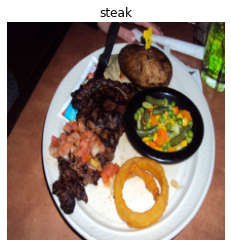

In [66]:
# Visualize a single image

# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label


# Plot image with matplotlib
# rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);